In [1]:
import os
%pwd
os.chdir("../")

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("engine_data.csv")
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [4]:
df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [5]:
# f, (ax1) = plt.subplots(1, 1, figsize=(12,6))
# corr = df.corr()
# sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)

In [6]:
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [7]:
df.isnull().sum().max()

0

In [8]:
df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [9]:
print('Great Condition', round(df['Engine Condition'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Maintenance', round(df['Engine Condition'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Great Condition 36.95 % of the dataset
Maintenance 63.05 % of the dataset


In [10]:
class_counts = df['Engine Condition'].value_counts()
print(class_counts)

Engine Condition
1    12317
0     7218
Name: count, dtype: int64


Text(0.5, 1.0, 'Class Distributions \n (0: Great Condition || 1: Maintenance)')

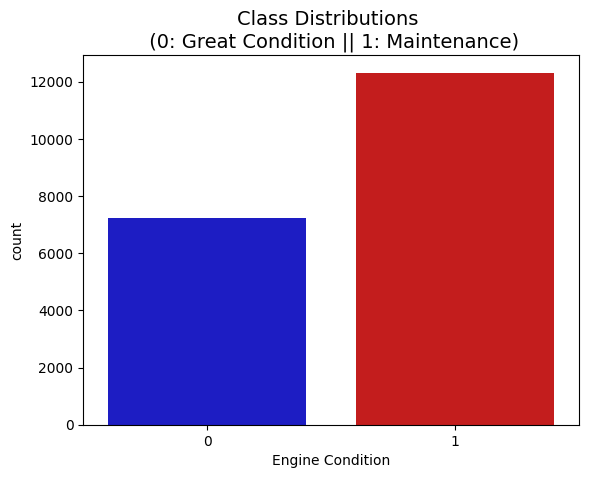

In [11]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x=df["Engine Condition"], palette=colors)
plt.title('Class Distributions \n (0: Great Condition || 1: Maintenance)', fontsize=14)

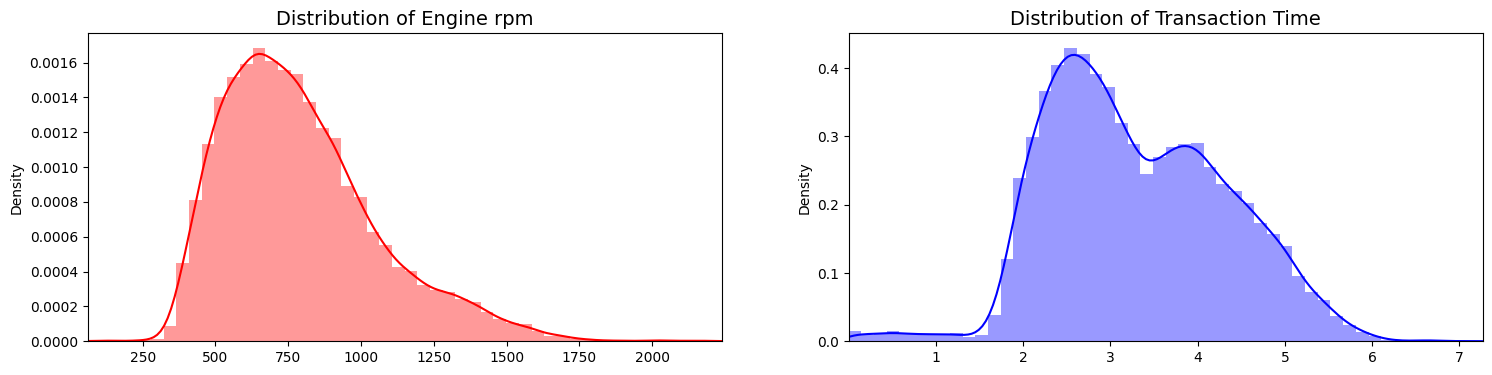

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

engine_val = df['Engine rpm'].values
lub_oil_val = df['Lub oil pressure'].values

sns.distplot(engine_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Engine rpm', fontsize=14)
ax[0].set_xlim([min(engine_val), max(engine_val)])

sns.distplot(lub_oil_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(lub_oil_val), max(lub_oil_val)])




plt.show()


In [13]:
from sklearn.preprocessing import RobustScaler
columns_to_scale = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']
scaler = RobustScaler()
scaled_columns = scaler.fit_transform(df[columns_to_scale])
df_scaled = pd.DataFrame(scaled_columns, columns=columns_to_scale)
df_scaled_with_target = pd.concat([df_scaled, df['Engine Condition']], axis=1)
df_scaled_with_target.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,-0.134897,-0.435055,1.976321,0.810733,3.123507,0.364249,1
1,0.381232,-0.143466,3.533182,0.238407,0.351104,0.454442,0
2,-0.662757,-0.130358,0.124263,-0.883178,0.398566,0.144026,1
3,-0.800587,0.355233,4.705814,1.250084,-1.145689,-0.728608,1
4,-0.372434,1.634204,3.372298,-0.091825,0.673419,0.959376,0


In [14]:
print('Great Condition', round(df['Engine Condition'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Maintenance', round(df['Engine Condition'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Engine Condition', axis=1)
y = df['Engine Condition']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Great Condition 36.95 % of the dataset
Maintenance 63.05 % of the dataset
Train: [ 3895  3896  3898 ... 19532 19533 19534] Test: [   0    1    2 ... 3910 3911 3913]
Train: [    0     1     2 ... 19532 19533 19534] Test: [3895 3896 3898 ... 7818 7819 7822]
Train: [    0     1     2 ... 19532 19533 19534] Test: [ 7803  7804  7805 ... 11719 11722 11723]
Train: [    0     1     2 ... 19532 19533 19534] Test: [11717 11720 11721 ... 15625 15627 15631]
Train: [    0     1     2 ... 15625 15627 15631] Test: [15626 15628 15629 ... 19532 19533 19534]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.36946506 0.63053494]
[0.36959304 0.63040696]


In [15]:
df_scaled_with_target = df_scaled_with_target.sample(frac=1)
maintenance_df = df_scaled_with_target.loc[df['Engine Condition'] == 1][:7218]
great_df = df_scaled_with_target.loc[df['Engine Condition'] == 0]

normal_distributed_df = pd.concat([maintenance_df, great_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
18766,-0.539589,0.100845,-0.425302,-0.310700,-0.107278,0.575070,0
16635,0.366569,0.361952,-0.379813,0.532279,3.425162,0.227666,1
3482,-0.058651,-0.259104,-0.288255,1.994178,0.066469,-0.330742,1
1953,-0.595308,-0.522277,0.389077,-0.736761,2.495214,-0.391110,1
14030,0.815249,0.562581,0.508595,-0.326707,-0.373701,-0.928993,1


Distribution of the Engine Condition in the subsample dataset
Engine Condition
0    0.5
1    0.5
Name: count, dtype: float64


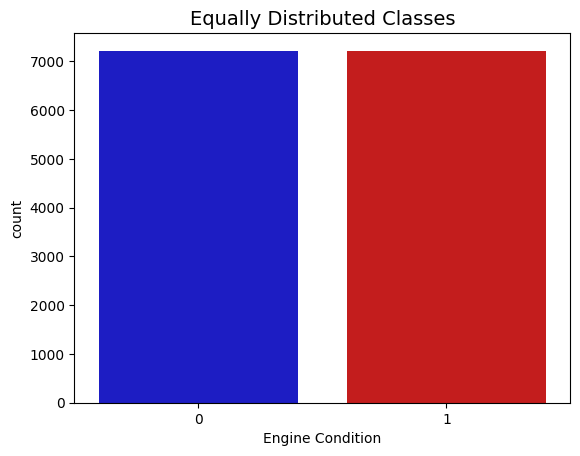

In [16]:
print('Distribution of the Engine Condition in the subsample dataset')
print(new_df['Engine Condition'].value_counts()/len(new_df))
sns.countplot(x=new_df["Engine Condition"], palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

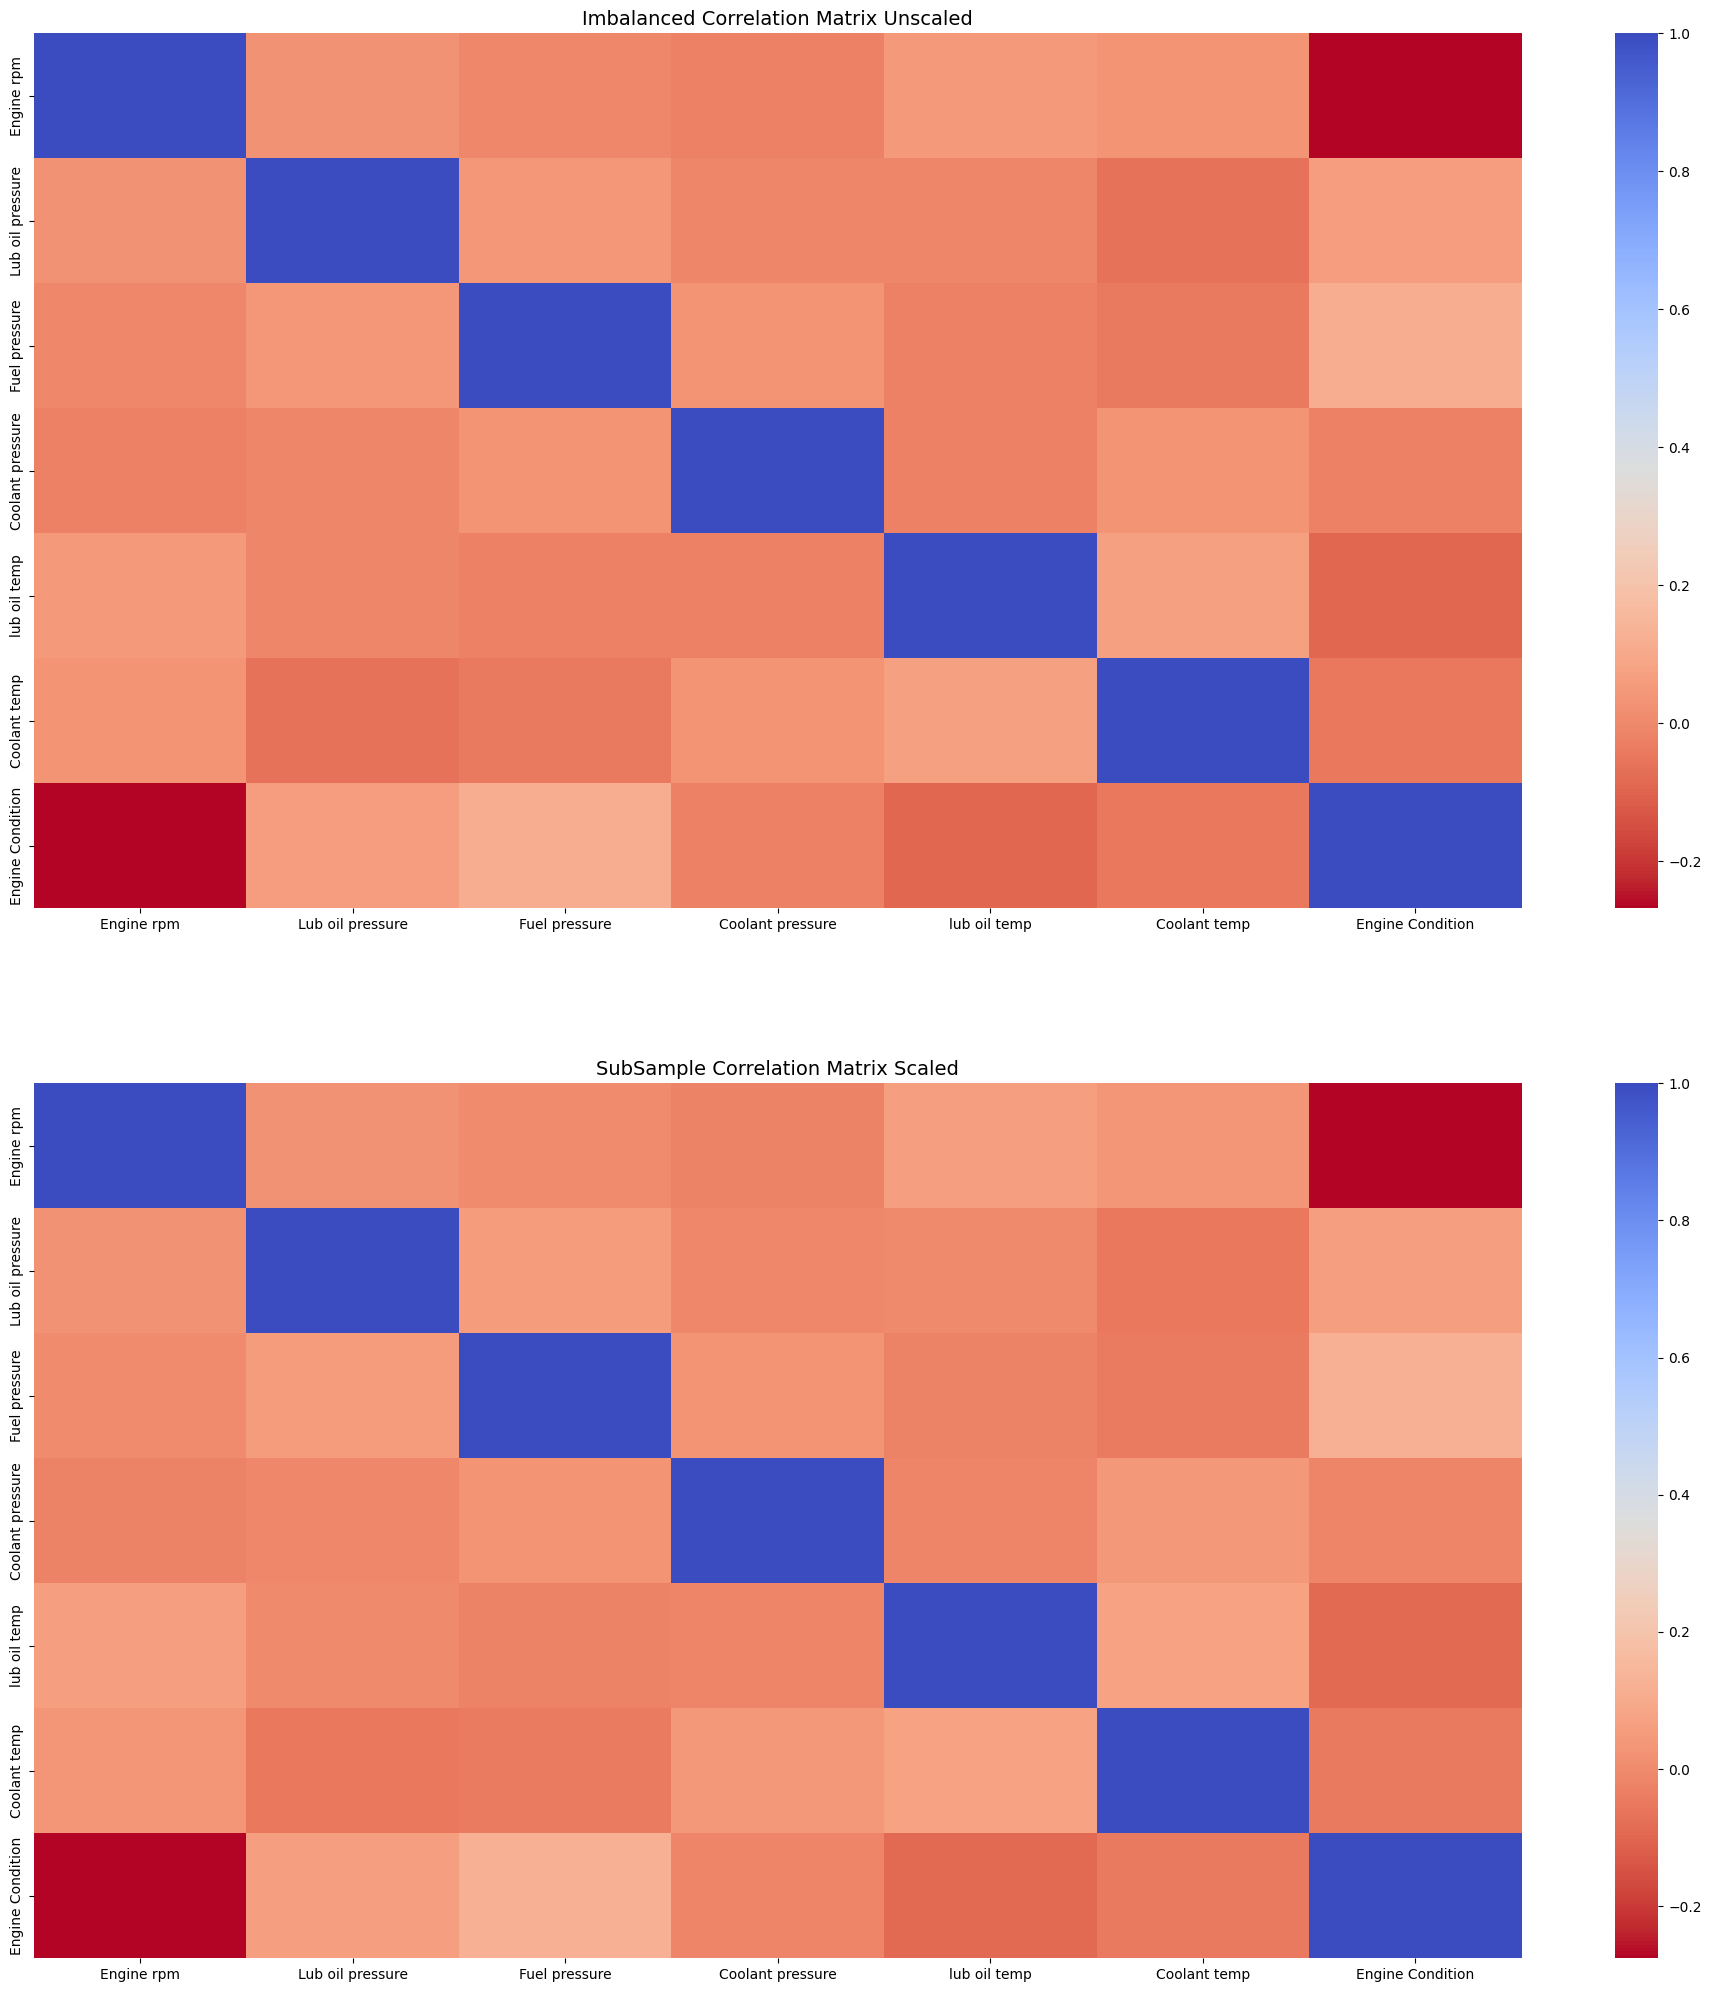

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,25))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix Unscaled", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix Scaled', fontsize=14)
plt.show()

In [18]:
new_df.shape

(14436, 7)

In [19]:
df.shape

(19535, 7)

In [20]:
df= df.sample(frac=1)
maintenance_df = df.loc[df['Engine Condition'] == 1][:7218]
great_df = df.loc[df['Engine Condition'] == 0]

df = pd.concat([maintenance_df, great_df])

# Shuffle dataframe rows
df = df.sample(frac=1, random_state=42)

df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
6536,1477,2.469251,6.621739,1.937980,74.575771,86.708335,0
12772,408,1.756400,7.130136,6.321255,76.723767,90.633326,1
3791,946,3.088068,5.324109,1.082368,77.379498,82.712306,1
12266,715,2.381918,4.003551,2.988445,78.532178,76.366577,1
11529,625,4.199612,4.227677,2.190948,73.605762,82.242379,1


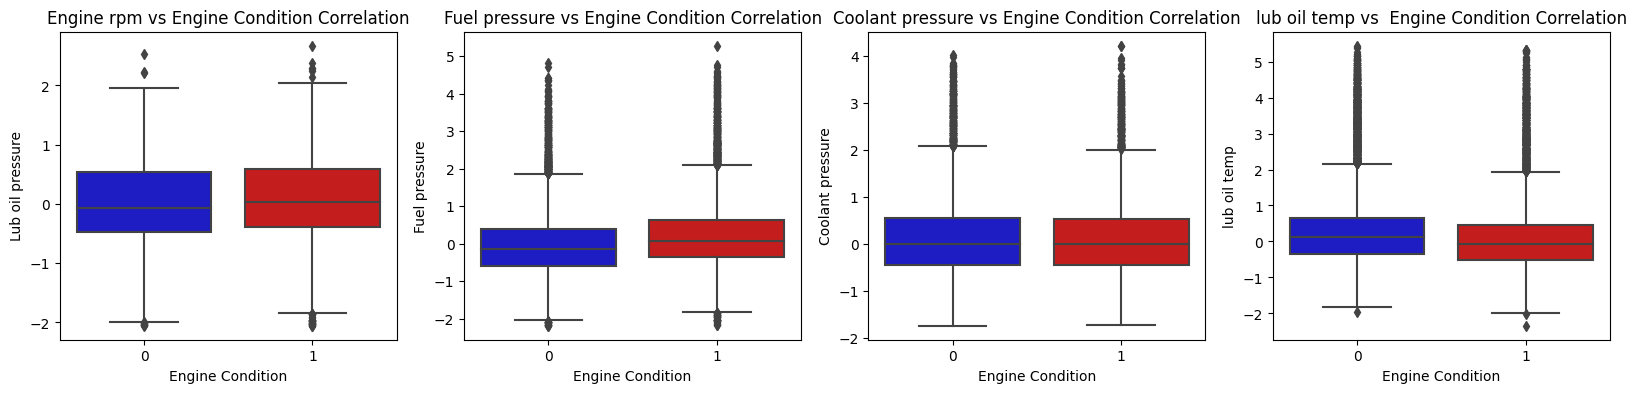

In [21]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Engine Condition", y="Lub oil pressure", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('Engine rpm vs Engine Condition Correlation')

sns.boxplot(x="Engine Condition", y="Fuel pressure", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('Fuel pressure vs Engine Condition Correlation')


sns.boxplot(x="Engine Condition", y="Coolant pressure", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('Coolant pressure vs Engine Condition Correlation')


sns.boxplot(x="Engine Condition", y="lub oil temp", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('lub oil temp vs  Engine Condition Correlation')

plt.show()

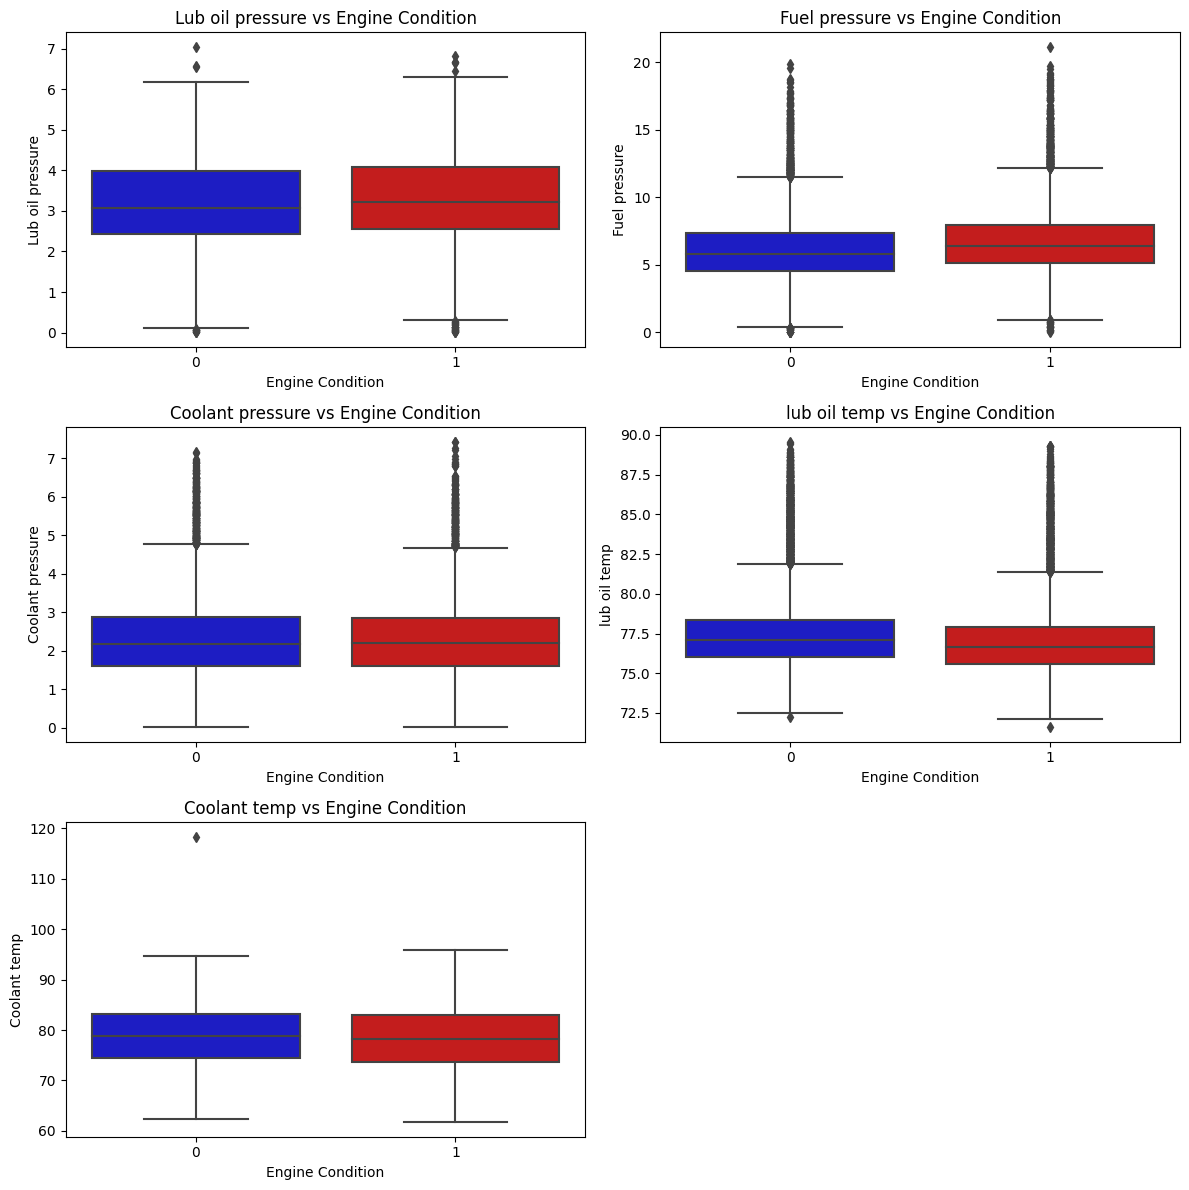

In [22]:
colors = ["#0101DF", "#DF0101"]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Box plots for each feature against Engine Condition
sns.boxplot(x="Engine Condition", y="Lub oil pressure", data=df, palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Lub oil pressure vs Engine Condition')

sns.boxplot(x="Engine Condition", y="Fuel pressure", data=df, palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Fuel pressure vs Engine Condition')

sns.boxplot(x="Engine Condition", y="Coolant pressure", data=df, palette=colors, ax=axes[1, 0])
axes[1, 0].set_title('Coolant pressure vs Engine Condition')

sns.boxplot(x="Engine Condition", y="lub oil temp", data=df, palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('lub oil temp vs Engine Condition')

sns.boxplot(x="Engine Condition", y="Coolant temp", data=df, palette=colors, ax=axes[2, 0])
axes[2, 0].set_title('Coolant temp vs Engine Condition')

# Remove empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()


In [23]:
df

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
6536,1477,2.469251,6.621739,1.937980,74.575771,86.708335,0
12772,408,1.756400,7.130136,6.321255,76.723767,90.633326,1
3791,946,3.088068,5.324109,1.082368,77.379498,82.712306,1
12266,715,2.381918,4.003551,2.988445,78.532178,76.366577,1
11529,625,4.199612,4.227677,2.190948,73.605762,82.242379,1
...,...,...,...,...,...,...,...
8163,663,1.691702,14.550650,1.207890,76.822897,88.157140,1
13813,569,3.095998,3.364111,3.936736,75.819717,91.070024,0
6821,793,4.863276,3.840321,2.208231,77.331518,67.645657,1
6847,747,1.722408,8.206798,2.306975,77.186171,82.755831,1


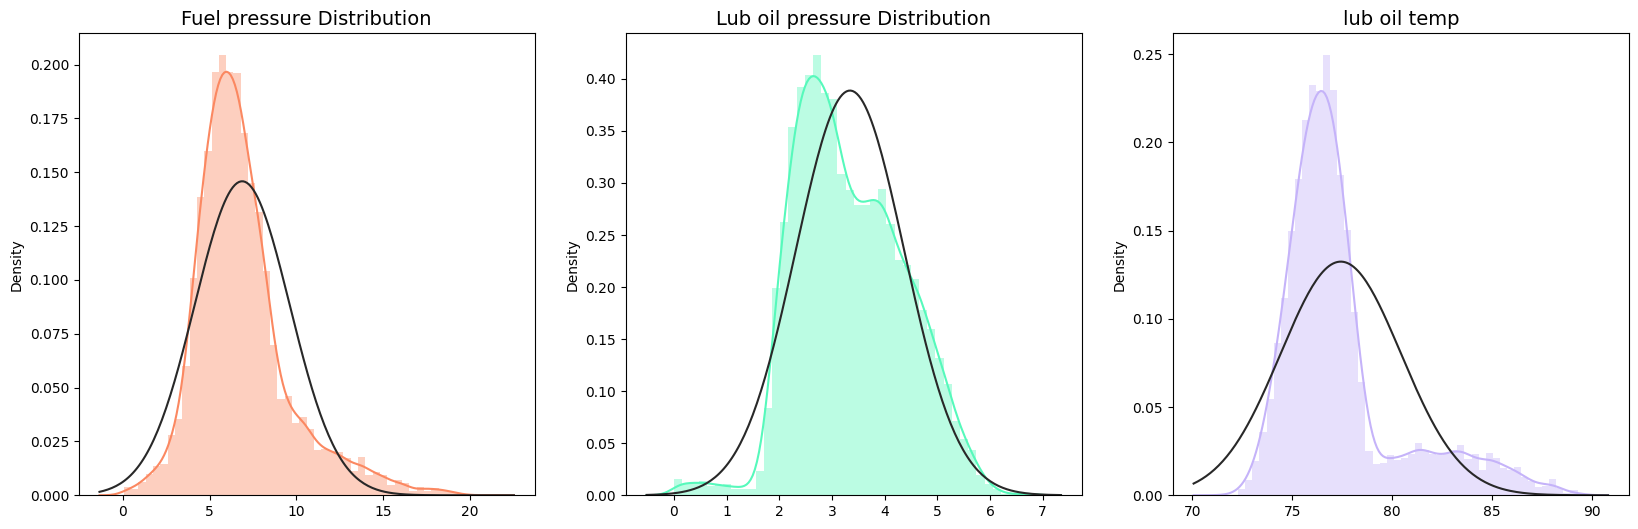

In [24]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

Fuel_pressure_dist = df['Fuel pressure'].loc[df['Engine Condition'] == 1].values
sns.distplot(Fuel_pressure_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Fuel pressure Distribution', fontsize=14)

Lub_oil_pressure_dist = df['Lub oil pressure'].loc[df['Engine Condition'] == 1].values
sns.distplot(Lub_oil_pressure_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Lub oil pressure Distribution', fontsize=14)


lub_oil_temp_dist = df['lub oil temp'].loc[df['Engine Condition'] == 1].values
sns.distplot(lub_oil_temp_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('lub oil temp', fontsize=14)

plt.show()

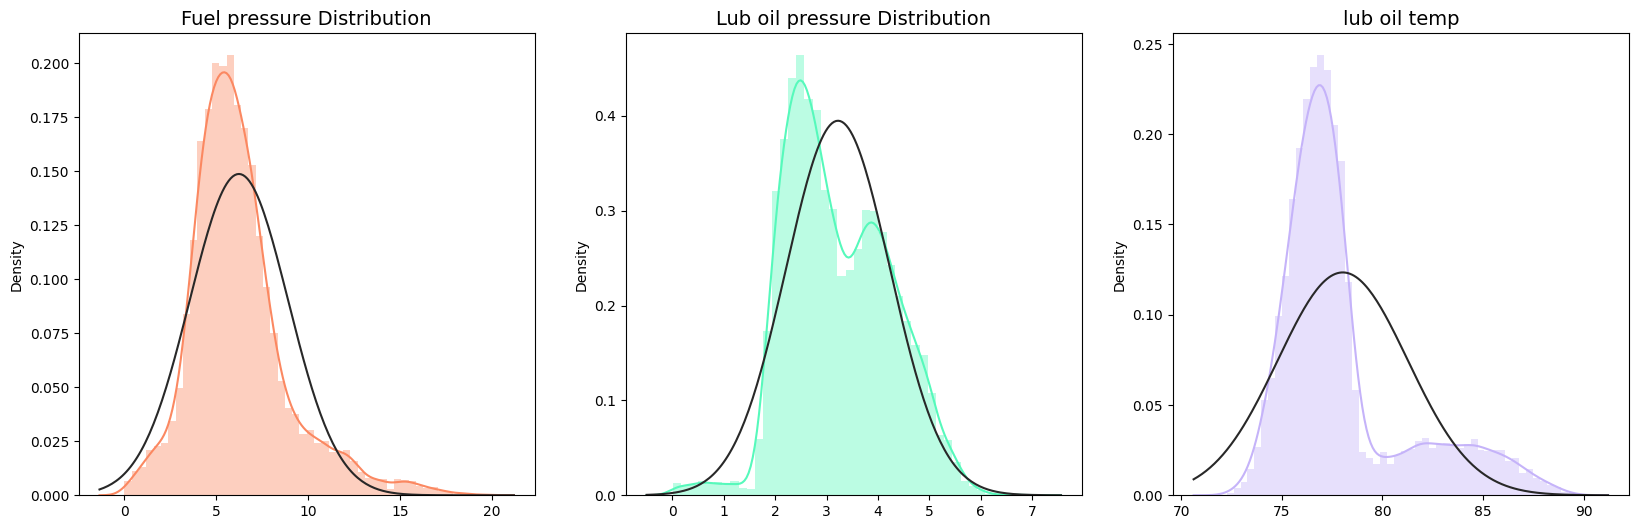

In [25]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

Fuel_pressure_dist = df['Fuel pressure'].loc[df['Engine Condition'] == 0].values
sns.distplot(Fuel_pressure_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Fuel pressure Distribution', fontsize=14)

Lub_oil_pressure_dist = df['Lub oil pressure'].loc[df['Engine Condition'] == 0].values
sns.distplot(Lub_oil_pressure_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Lub oil pressure Distribution', fontsize=14)


lub_oil_temp_dist = df['lub oil temp'].loc[df['Engine Condition'] == 0].values
sns.distplot(lub_oil_temp_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('lub oil temp', fontsize=14)

plt.show()

In [26]:
X = df.drop('Engine Condition', axis=1)
y = df['Engine Condition']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [29]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [36]:
from sklearn.model_selection import cross_val_score
import pickle



best_accuracy = 0.0
best_model = None


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train) 
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    accuracy = round(training_score.mean(), 2) * 100
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = classifier

# Save the best model to a .pkl file
if best_model is not None:
    best_model_filename = 'model.pkl'
    with open(best_model_filename, 'wb') as model_file:
        pickle.dump(best_model, model_file)
    print("Best model saved as", best_model_filename)

Classifiers:  LogisticRegression Has a training score of 64.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 59.0 % accuracy score
Classifiers:  SVC Has a training score of 63.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 56.00000000000001 % accuracy score
Best model saved as model.pkl


In [40]:
df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [47]:
print(df['Coolant temp'].min())
print(df['Coolant temp'].max())

61.67332472
118.371957


In [37]:
import pickle
import numpy as np

def predict_engine_condition(engine_rpm, lub_oil_pressure, fuel_pressure, coolant_pressure, lub_oil_temp, coolant_temp):
    # Load the saved best model
    with open('model.pkl', 'rb') as model_file:
        best_model = pickle.load(model_file)

    # Create an input array from the provided inputs
    input_data = np.array([[engine_rpm, lub_oil_pressure, fuel_pressure, coolant_pressure, lub_oil_temp, coolant_temp]])

    # Perform prediction using the best model
    predicted_class = best_model.predict(input_data)[0]
    
    # Convert predicted class to meaningful condition
    if predicted_class == 0:
        engine_condition = 'Normal'
    else:
        engine_condition = 'Abnormal'

    return engine_condition

# Example usage
engine_rpm = 3000
lub_oil_pressure = 40
fuel_pressure = 20
coolant_pressure = 15
lub_oil_temp = 80
coolant_temp = 90

predicted_condition = predict_engine_condition(engine_rpm, lub_oil_pressure, fuel_pressure, coolant_pressure, lub_oil_temp, coolant_temp)
print("Predicted Engine Condition:", predicted_condition)


Predicted Engine Condition: Abnormal


In [39]:
import pickle
import numpy as np

def predict_with_logreg(input_data):
    # Load the trained logistic regression model
    with open('model.pkl', 'rb') as model_file:
        logreg_model = pickle.load(model_file)

    # Ensure the input data has the same order of features as during training
    features = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 
                'Coolant pressure', 'Lub oil temp', 'Coolant temp']
    
    if set(features) != set(input_data.keys()):
        raise ValueError("Input data doesn't have the correct features.")

    # Convert input data to a numpy array in the correct order
    input_array = np.array([input_data[feature] for feature in features]).reshape(1, -1)

    # Predict using the trained model
    predicted_class = logreg_model.predict(input_array)
    predicted_probabilities = logreg_model.predict_proba(input_array)

    return predicted_class[0], predicted_probabilities[0]

# Example input data
input_data = {
    'Engine rpm': 3000,
    'Lub oil pressure': 40,
    'Fuel pressure': 20,
    'Coolant pressure': 15,
    'Lub oil temp': 80,
    'Coolant temp': 90
}

predicted_class, predicted_probabilities = predict_with_logreg(input_data)
print("Predicted Class:", predicted_class)
print("Predicted Probabilities:", predicted_probabilities)


Predicted Class: 1
Predicted Probabilities: [0.01918478 0.98081522]


In [30]:
X1 = new_df.drop('Engine Condition', axis=1)
y1 = new_df['Engine Condition']

In [31]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [32]:
X1_train = X1_train.values
X1_test = X1_test.values
y1_train = y1_train.values
y1_test = y1_test.values

In [33]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [34]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X1_train, y1_train) 
    training_score = cross_val_score(classifier, X1_train, y1_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 64.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 61.0 % accuracy score
Classifiers:  SVC Has a training score of 65.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 56.00000000000001 % accuracy score


In [35]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

In [36]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  63.6%


In [37]:
# We will undersample during cross validating
undersample_X = df.drop('Engine Condition', axis=1)
undersample_y = df['Engine Condition']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
nm = NearMiss(sampling_strategy='majority')  # Undersample majority class
X_nearmiss, y_nearmiss = nm.fit_resample(undersample_Xtrain, undersample_ytrain)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 2845  2847  2848 ... 14433 14434 14435] Test: [   0    1    2 ... 2913 2914 2915]
Train: [    0     1     2 ... 14433 14434 14435] Test: [2845 2847 2848 ... 5814 5815 5816]
Train: [    0     1     2 ... 14433 14434 14435] Test: [5714 5716 5722 ... 8670 8676 8678]
Train: [    0     1     2 ... 14433 14434 14435] Test: [ 8645  8646  8648 ... 11568 11570 11571]
Train: [    0     1     2 ... 11568 11570 11571] Test: [11513 11514 11516 ... 14433 14434 14435]
NearMiss Label Distribution: Counter({0: 5774, 1: 5774})


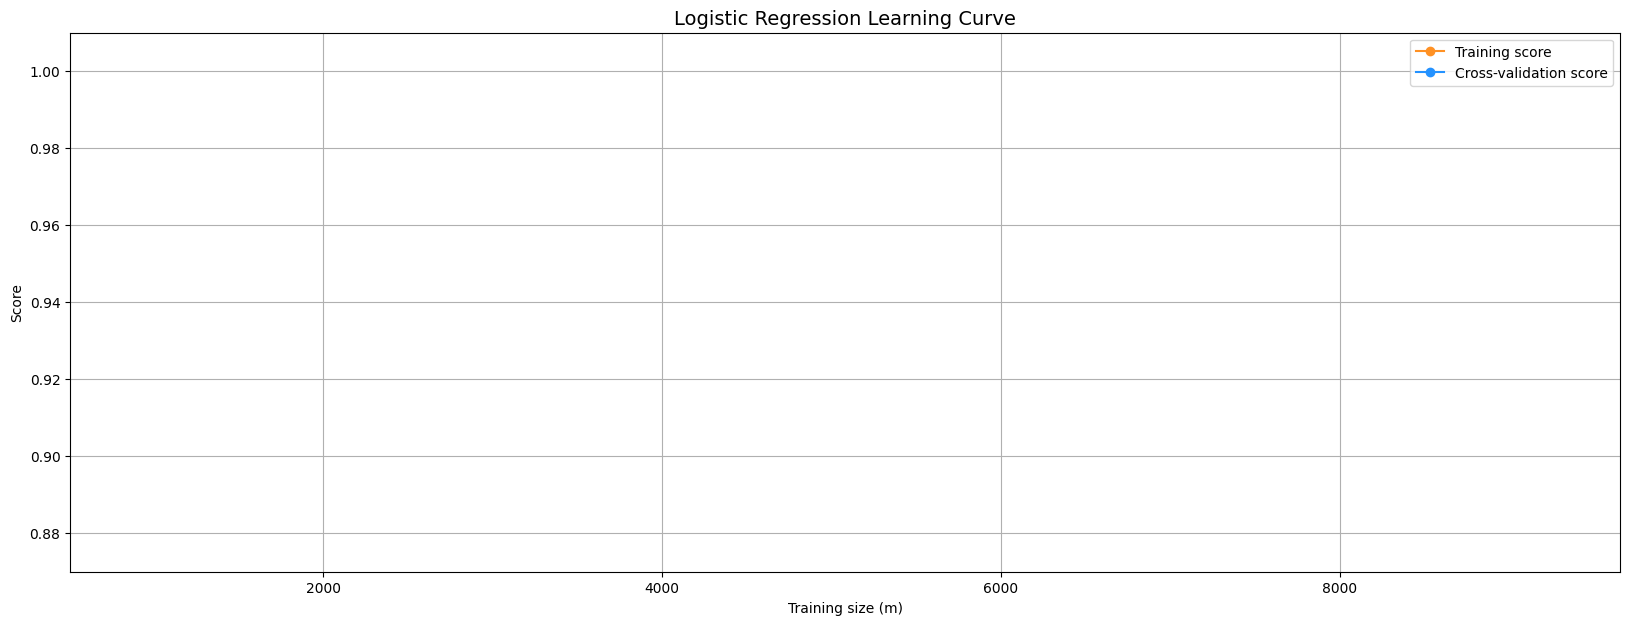

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Create a Logistic Regression model (you might need to adjust the parameters)
log_reg = LogisticRegression()

def plot_learning_curve(estimator1, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1) = plt.subplots(1, 1, figsize=(20, 7), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    return plt

# Assuming you have X_train and y_train defined
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)
plt.show()  # Display the plot


In [39]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

In [40]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))

Logistic Regression:  0.6840392842332909


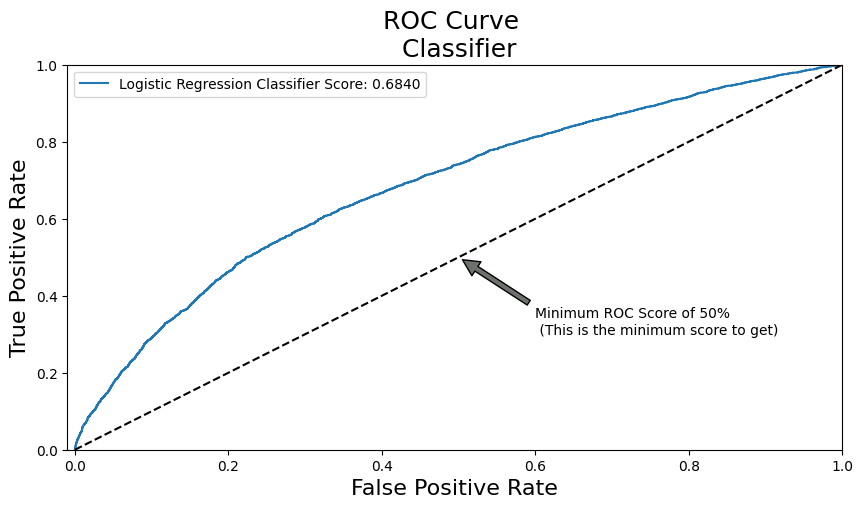

In [41]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr):
    plt.figure(figsize=(10,5))
    plt.title('ROC Curve \n Classifier', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr,log_tpr)
plt.show()

In [42]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [43]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.66
Precision Score: 0.63
F1 Score: 0.65
Accuracy Score: 0.64
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.64
Precision Score: 0.63
Recall Score: 0.53
F1 Score: 0.57
---------------------------------------------------------------------------------------------------------------------------------------


In [44]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [45]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.79


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.79')

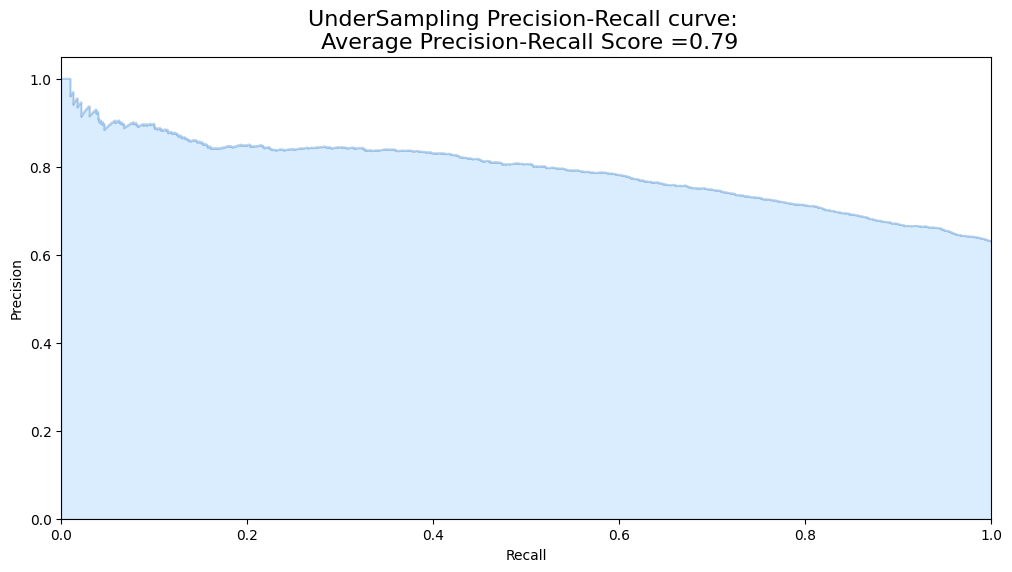

In [46]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 15628 | Length of y (train): 15628
Length of X (test): 3907 | Length of y (test): 3907
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.6418609750479847
precision: 0.7397776423231355
recall: 0.666531817959396
f1: 0.7012026693870791
---------------------------------------------------------------------------------------------------------------------------------------


In [48]:
labels = ['Great Condition', 'Maintenance']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

                 precision    recall  f1-score   support

Great Condition       0.53      0.63      0.58      1444
    Maintenance       0.76      0.68      0.71      2463

       accuracy                           0.66      3907
      macro avg       0.65      0.65      0.65      3907
   weighted avg       0.67      0.66      0.66      3907



In [49]:
y_score = best_est.decision_function(original_Xtest)

In [50]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.78


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.78')

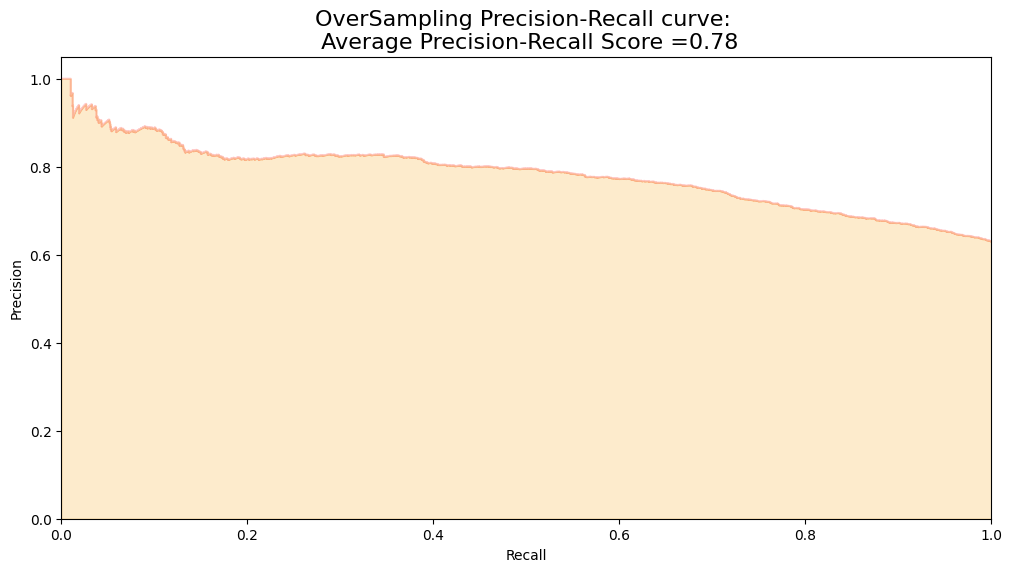

In [51]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [52]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='auto', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [53]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.19268202781677246 sec


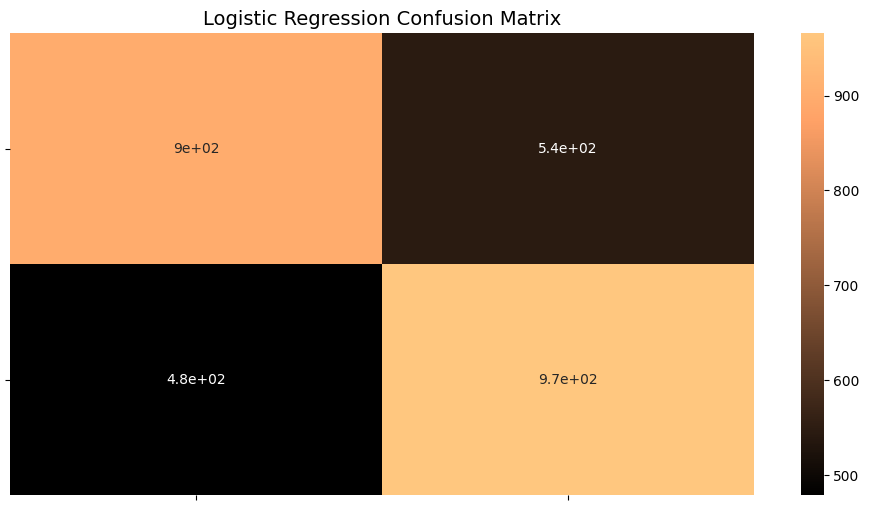

In [54]:
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and fitted your logistic regression model
y_pred_log_reg = log_reg_sm.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))  # Adjust the figsize as needed

sns.heatmap(log_reg_cf, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Logistic Regression Confusion Matrix", fontsize=14)
ax.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax.set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()


In [55]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.65      0.62      0.64      1443
           1       0.64      0.67      0.65      1445

    accuracy                           0.65      2888
   macro avg       0.65      0.65      0.65      2888
weighted avg       0.65      0.65      0.65      2888



In [56]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.651316
1,Oversampling (SMOTE),0.659585


In [57]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [58]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 32)                224       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 332 (1.30 KB)
Trainable params: 332 (1.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
undersample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
370/370 - 2s - loss: 2.6360 - accuracy: 0.5206 - val_loss: 1.0104 - val_accuracy: 0.5593 - 2s/epoch - 5ms/step
Epoch 2/20
370/370 - 1s - loss: 0.9210 - accuracy: 0.5289 - val_loss: 0.7701 - val_accuracy: 0.5784 - 725ms/epoch - 2ms/step
Epoch 3/20
370/370 - 1s - loss: 0.8678 - accuracy: 0.5409 - val_loss: 0.7093 - val_accuracy: 0.5866 - 753ms/epoch - 2ms/step
Epoch 4/20
370/370 - 1s - loss: 0.7791 - accuracy: 0.5582 - val_loss: 0.7413 - val_accuracy: 0.5165 - 754ms/epoch - 2ms/step
Epoch 5/20
370/370 - 1s - loss: 0.7293 - accuracy: 0.5760 - val_loss: 0.9087 - val_accuracy: 0.5697 - 749ms/epoch - 2ms/step
Epoch 6/20
370/370 - 1s - loss: 0.7194 - accuracy: 0.5804 - val_loss: 0.6479 - val_accuracy: 0.6268 - 774ms/epoch - 2ms/step
Epoch 7/20
370/370 - 1s - loss: 0.8440 - accuracy: 0.5624 - val_loss: 0.9353 - val_accuracy: 0.4996 - 781ms/epoch - 2ms/step
Epoch 8/20
370/370 - 1s - loss: 0.7185 - accuracy: 0.5825 - val_loss: 0.9368 - val_accuracy: 0.5775 - 754ms/epoch - 2ms/step
Epo

In [61]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [62]:
undersample_fraud_probabilities = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions = undersample_fraud_probabilities.argmax(axis=-1)

In [63]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 204 1240]
 [ 130 2333]]
Confusion matrix, without normalization
[[1444    0]
 [   0 2463]]


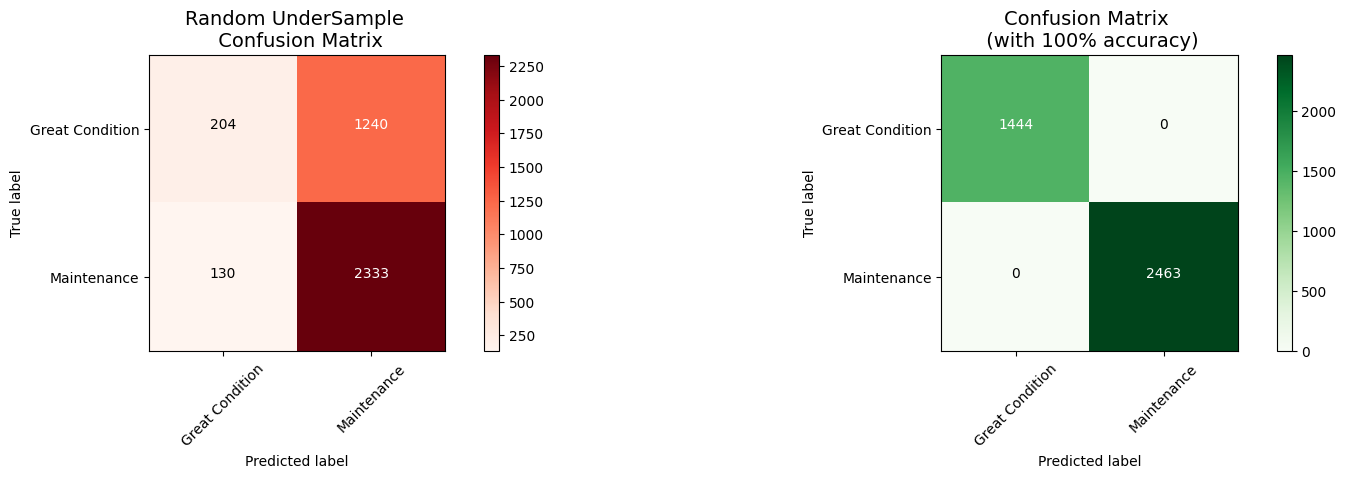

In [64]:

undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['Great Condition', 'Maintenance']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [65]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [66]:
oversample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
53/53 - 1s - loss: 25.5416 - accuracy: 0.4250 - val_loss: 8.3848 - val_accuracy: 0.0000e+00 - 1s/epoch - 19ms/step
Epoch 2/20
53/53 - 0s - loss: 0.9843 - accuracy: 0.5544 - val_loss: 0.7835 - val_accuracy: 0.0000e+00 - 159ms/epoch - 3ms/step
Epoch 3/20
53/53 - 0s - loss: 0.6699 - accuracy: 0.6250 - val_loss: 0.8909 - val_accuracy: 0.0000e+00 - 157ms/epoch - 3ms/step
Epoch 4/20
53/53 - 0s - loss: 0.6681 - accuracy: 0.6250 - val_loss: 0.8736 - val_accuracy: 0.0000e+00 - 164ms/epoch - 3ms/step
Epoch 5/20
53/53 - 0s - loss: 0.6666 - accuracy: 0.6257 - val_loss: 0.8040 - val_accuracy: 7.6104e-04 - 162ms/epoch - 3ms/step
Epoch 6/20
53/53 - 0s - loss: 0.6648 - accuracy: 0.6260 - val_loss: 0.8556 - val_accuracy: 0.0000e+00 - 156ms/epoch - 3ms/step
Epoch 7/20
53/53 - 0s - loss: 0.6651 - accuracy: 0.6277 - val_loss: 1.0386 - val_accuracy: 0.0000e+00 - 154ms/epoch - 3ms/step
Epoch 8/20
53/53 - 0s - loss: 0.6626 - accuracy: 0.6299 - val_loss: 0.8043 - val_accuracy: 0.0337 - 182ms/epoch 

In [68]:
oversample_fraud_probabilities = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)
oversample_fraud_predictions = oversample_fraud_probabilities.argmax(axis=-1)

Confusion matrix, without normalization
[[ 493  951]
 [ 417 2046]]
Confusion matrix, without normalization
[[1444    0]
 [   0 2463]]


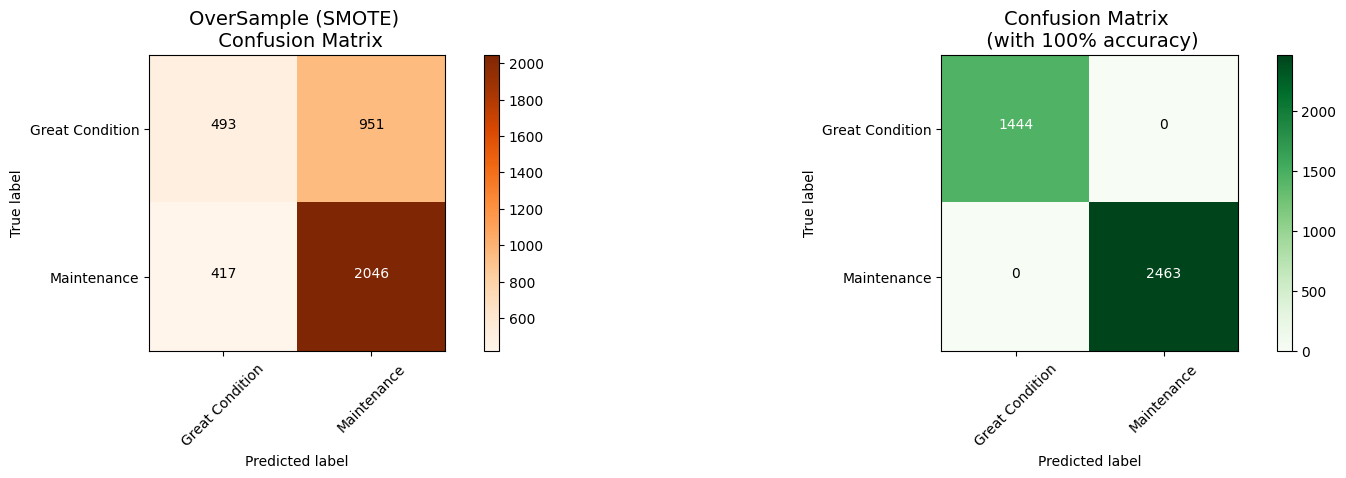

In [69]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['Great Condition', 'Maintenance']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)